# Devemos normalizar ou padronizar os dados quando aplicamos Principal Component Analysis (PCA) ?

Essa é uma pergunta super comum que fazemos quando vamos aplicar PCA nos nossos dados. Para ter uma resposta bem respaldada, devemos analisar os fundamentos por trás do algoritmo. Vamos primeiramente entender o que é normalização e sua diferença para a padronização (standardzation). Em seguinda, iremos verificar as implicações gerada pelos processos nos nossos dados para então decidir se devemos ou não aplicar alguma dessas duas técnicas.

## Centralizar os dados

Centralizar os dados é nada mais do que subtrair cada valor de uma determinada variável por uma constante - na maioria das vezes sua média. Essa técnica basicamente redefine o ponto zero da variável e é deterinado através do valor que é usado na subtração.

Qando centralizamos as nossas variáveis através da subtração de cada valor pela sua média amostral , estamos na verdade realizando uma transformação de forma que essa feature tenha uma média igual a zero.

Em outras palavras, podemos considerar essa transformação como a variação que a variável possui com relação a sua média.

Para o nosso caso em particular, como estamos prestes a aplicar PCA nos nossos dados, é importante dizer que a aplicação desse procedimento envolve o cálculo da matriz de covariancia para determinar a similaridade ou correlação das nossas variáveis e depois determinar os auto-valores e auto-vetores dessa matriz para encontrarmos os principal components. Dessa forma, devemos ter em mente que o cálculo que envolve a determinação da matriz de covariancia conta com dados centralizados.

## Normalização dos dados

O processo de normalização pode ser determinado de diferentes formas. Para a nossa análise, vamos considerar a normalização unitária que consiste em transformar os dados de forma em que os mesmos fiquem no intervalo [0-1] e é determinada pela fórmula abaixo.

\begin{equation*}
Xnorm = 
\frac{X - Xmin}{Xmax - Xmin} 
\end{equation*}

Para entender a importância da normalização vamos considerar duas caracteristicas: magnitude e unidade. No caso do nosso dataset, temos a coluna Age que representa a idade do jogador (magnitude) e anos como unidade de medida. Supondo que exista uma coluna representando a altura do jogador. Nesse caso poderiamos determinar cada altura como a magnitude da variável e centímetros ou metros como unidade de medida. E porque essas informações são importantes?

Alguns algoritmos de machine learning, como k-means e kNN fazem uso da distância euclidiana como parte de seu algoritmo. Dessa forma, features com magnitudes muito diferentes terão um grande impacto no modelo e podem afetar signicamente sua performance. Um outro exemplo é a regressão linear, cujo coeficientes são determinados com auxilio do algoritmo de gradient descent. Nesse caso, quanto maior a magnitude das variáveis, maiores as chances dos coeficientes inicializados randomicamente no algoritmo estarem muito distantes do minimo global. Dessa forma, a convergência pode demorar a acontecer ou até mesmo não acontecer.

Quando colocamos as variáveis na mesma escala, evitamos problemas como os mencionados acima.

Importante dizer que nem todo algoritmo de machine learning necessidade de dados normalizados. Como exemplo temos decision tree e random forest.

## Padronização

A padronização ou standardization é uma técnica que faz com que os dados de uma determinada feature fiquem centralizadas em torno da média zero com desvio padrão igual a 1. Esse processo é calculado com a equação abaixo:

\begin{equation*}
z = 
\frac{x -  \mu}{\sigma} 
\end{equation*}

Assim como a normalização, a padronização faz com que features com diferentes magnitudes e unidades possuam igual importância para o modelo de machine learning. Por exemplo, imagine que uma variável possua unidade em Peso chileno e a outra em Real ( na cotação atual 1 peso equivale a 0.0065 real). A magnitude de cada coluna é signigicatiamente diferente e por conta disso a padronização se faz necessária. Caso contrário uma variável apresentará maior variância e consequentemente dominará o resultado. Quando padronizamos, estando fazendo com que as features possuam igual variabilidade e portanto igual importância.

Note que no caso em que as unidades de medidas sejam as mesmas, talvez não seja necessário a normalização ou padronização dos dados pois a diferença na variabilidade dos dados nesse caso pode ter importância.

A equação abaixo mostra o algoritmo de otimização (gradient descent) aplicado em muitos modelos de machine learning. Podemos notar que features com diferentes escalas podem afetar a performance da otimizaçao pois a variavel x possui uma grande significância no processo de atualização dos pesos.

\begin{equation*}
\Delta w_j = 
\eta  \frac{\partial J}{\partial w_j} = \eta \sum_{n=i}(t^i - o^i) x^i_j
\end{equation*}

## Padronizar ou Normalizar ?

Bom, não temos uma resposta direta e definida para essa pergunta. De fato, isso depende muito da aplicaçao em que os dados serão utilizados. Quando estamos performando um algoritmo de clustering, pode ser interessante realizar uma padronização dos dados, pois o modelo consiste em comparar similaridade de variáveis baseado em medições de distancia. por outro lado, nos casos de redes neurais, uma normalização entre [0-1] pode ser adequado devido a natureza do processo de otimização dos parâmetros.

A melhor escolha a se fazer quando está analisando a utilizaçao de uma dessas duas técnicas é entender o processo por trás do algorítmo em que os dados serão aplicados ou simplesmente testar cada um e ver qual performa melhor.

## Devo preprocessar meus dados antes de aplicar PCA ?

Bom vamos primeiramente tentar sumarizar o algoritmo de PCA para tentar entender a possível necessidade de normalizar ou padronizar os dados. Com a finalidade de simplificar a explicação, vou simplesmente resumir o processo em duas principais etapas: matriz de covariância, calculo dos auto-valores e auto-vetores da matriz de covariância para identificação dos componentes.

* Matriz de covariancia : O principal motivo de calcularmos essa matriz é entender como as features estão variando da média com relaçao umas as outras. Basicamente a informação principal que queremos saber é a relação entre as variáveis. Dessa forma, conseguimos estabelecer a correlação entre as mesmas e verificar se existe redundância no nosso data set. Algebricamente, a matriz consiste em ser simétrica nxn, sendo n o número de features. Cada elemento corresponde a correlação entre um par de variáveis.

* Auto-valores e Auto-vetores: São computados diretamente da matriz de covariância com o objetivo de determinar os componentes principais dos dados. Estes por sua vez são variáveis advindas de combinações lineares das variáveis originais (n). Tais combinações são realizadas de forma que as variáveis novas, ou componentes principais, sejam não-correlacionados e o máximo de informações contida nas features originais estejam contidas nos primeiros componentes. Por exemplo, se um data set contem 20 variáveis, a combinação linear resultará em 10 componentes principais, porém a primeira consistirá com maior representatividade em termos de informação, a segunda com um pouco menos de informação e assim sucessivamente.

Diante disso, o que dizer sobre a necessidade de normalizar ou padronizar os dados ? Bom, como descrito acima, o PCA está interessado em determinar os componentes que representam a máxima variância dos dados. Basicamente, o algoritmo calcula novas projeções dos dados baseado no desvio padrao das features - estas que afetam diretamente a matriz de covariância. Dessa forma, variáveis com grandes desvio padrão terão maior peso no cálculo da combinação linear.

Ao normalizar ou padronizamos os dados, estamos fazendo com que todas as variáveis possuam pesos iguais e diminuindo a chance de termos auto-valores e auto-vetores diferentes dos que realmente representariam as informações corretas das nossas variáveis.

 **Resumindo, diante da análise, eu diria que é sim importante realizar esse preprocessamento antes de aplicar PCA. Particularmente, eu nunca vi uma aplicação desse algoritmo sem pelo menos colocar as variáveis em mesma escala. De qualquer forma, recomendo entender bem seus dados e verificar a necessidade de realizar alguns desses preprocessamento.**

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
df = pd.read_csv("fifa.csv")
display("Shape do dataframe:", df.shape)
print()
df.head(3)

'Shape do dataframe:'

(18207, 89)

Unnamed: 0      ID               Name  Age  \
0           0  158023           L. Messi   31   
1           1   20801  Cristiano Ronaldo   33   
2           2  190871          Neymar Jr   26   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   

                  Club  ... Composure Marking StandingTackle  SlidingTackle  \
0         FC Barcelona  ...      96.0    33.0           28.0           26.0   
1             Juventus  ...      95.0    28.0           31.0           23.0   
2  Paris Saint-Germain  ...      94.0    27.0           24.0           33.0   

  GKDiving  GKHandling  GKKicking  GKPositioning GKReflexes Release Clause  
0      6.0        11.0       15.0           14.0        8.0        €226.5M  
1      7.0        11.0       15.0           14.0       11.0        €127.1M  
2      9.0         9.0       15.0           15.0       11.0        €228.1M  

[3 rows x 89 columns]

In [13]:
columns_to_drop = ["Unnamed: 0", "ID", "Name", "Photo", "Nationality", "Flag",
                   "Club", "Club Logo", "Value", "Wage", "Special", "Preferred Foot",
                   "International Reputation", "Weak Foot", "Skill Moves", "Work Rate",
                   "Body Type", "Real Face", "Position", "Jersey Number", "Joined",
                   "Loaned From", "Contract Valid Until", "Height", "Weight", "LS",
                   "ST", "RS", "LW", "LF", "CF", "RF", "RW", "LAM", "CAM", "RAM", "LM",
                   "LCM", "CM", "RCM", "RM", "LWB", "LDM", "CDM", "RDM", "RWB", "LB", "LCB",
                   "CB", "RCB", "RB", "Release Clause"
]

df.drop(columns_to_drop, axis=1, inplace=True)

print("Shape do dataframe depois de dropar as colunas:", df.shape)

Shape do dataframe depois de dropar as colunas: (18207, 37)


## Missing Values

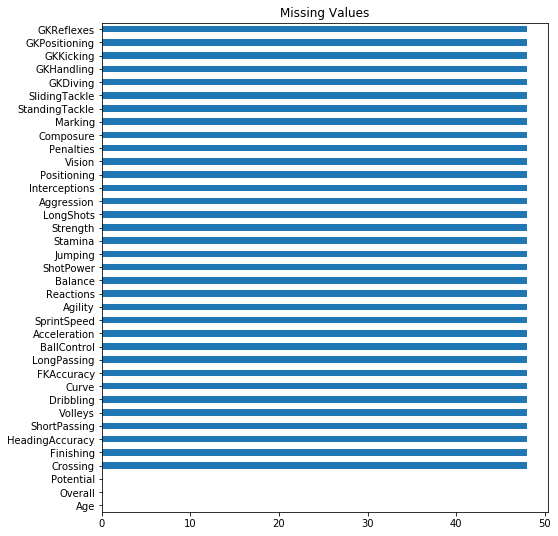

In [25]:
plt.title('Missing Values')
df.isnull().sum().plot(kind = 'barh',figsize = (8,9))

In [26]:
#Drop missing values
df.dropna(inplace = True)

# data Scaling 

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_fifa = scaler.fit_transform(df.astype(float))
scaled_fifa

array([[ 1.25844069,  4.01336435,  3.69741542, ..., -0.07465947,
        -0.14024128, -0.48516121],
       [ 1.68666591,  4.01336435,  3.69741542, ..., -0.07465947,
        -0.14024128, -0.31807333],
       [ 0.18787765,  3.72411387,  3.53439634, ..., -0.07465947,
        -0.08153585, -0.31807333],
       ...,
       [-1.95324843, -2.78402193, -0.70409989, ..., -0.37764552,
        -0.6098847 , -0.20668142],
       [-1.73913582, -2.78402193, -0.86711898, ..., -0.13525668,
        -0.49247385, -0.42946525],
       [-1.95324843, -2.92864717, -0.86711898, ..., -0.43824273,
        -0.25765214, -0.42946525]])

In [28]:
# scaled dataframe
df_scaled = pd.DataFrame( data = scaled_fifa,
                        index = df.index ,
                        columns = df.columns)

df_scaled.head()

Age   Overall  Potential  Crossing  Finishing  HeadingAccuracy  \
0  1.258441  4.013364   3.697415  1.865922   2.532567         1.018552   
1  1.686666  4.013364   3.697415  1.865922   2.481351         2.111799   
2  0.187878  3.724114   3.534396  1.593650   2.122842         0.558238   
3  0.401990  3.579489   3.534396 -1.782517  -1.667116        -1.800873   
4  0.401990  3.579489   3.371377  2.356010   1.866764         0.155463   

   ShortPassing   Volleys  Dribbling     Curve  ...  Penalties  Composure  \
0      2.130287  2.435355   2.201445  2.491426  ...   1.684414   3.266205   
1      1.518005  2.491871   1.725503  1.839066  ...   2.321210   3.178760   
2      1.722099  2.322322   2.148563  2.219609  ...   2.066492   3.091316   
3     -0.590969 -1.690356  -1.976272 -1.422733  ...  -0.544371   0.817758   
4      2.266350  2.209288   1.619738  2.056519  ...   1.939132   2.566649   

    Marking  StandingTackle  SlidingTackle  GKDiving  GKHandling  GKKicking  \
0 -0.717531       -0.909268      -0.923569 -0.599961   -0.318908  -0.074659   
1 -0.968738       -0.770785      -1.064489 -0.543447   -0.318908  -0.074659   
2 -1.018980       -1.093911      -0.594753 -0.430420   -0.437206  -0.074659   
3 -1.621878       -1.232393      -1.534226  4.147180    4.058124   4.288340   
4  1.040923        0.475556       0.250772 -0.091339   -0.200610  -0.680632   

   GKPositioning  GKReflexes  
0      -0.140241   -0.485161  
1      -0.140241   -0.318073  
2      -0.081536   -0.318073  
3       4.203960    4.304691  
4      -0.375063   -0.206681  

[5 rows x 37 columns]

In [29]:
print('Shape of df:', df.shape)
print()
print('Shape of scaled_df', df_scaled.shape)
print()


Shape of df: (18159, 37)

Shape of scaled_df (18159, 37)



Agora que padronizamos o dataframe, podemos aplicar a redução de dimensionalidade. Para realizar tal tarefa, iremos utilizar o PCA para achar os vetores de máxima variância dos dados. Para iniciar, iremos manter todas as features do dataframe para que,dessa forma, a gente consiga verificar a real tendência de variabilidade nos nossos dados. Plotaremos então um gráfico mostrando a taxa dec variância explicada por cada componente e a variância cumulativa. So então, depois disso, iremos selecionar os número de variáveis transformadas nos iresmos utilizar na redução da dimensionalidadec. 


In [30]:
from sklearn.decomposition import PCA
pca = PCA()

pca_array = pca.fit_transform(df_scaled)
pca_array

array([[-8.97775105e+00, -5.06169855e+00,  5.85188459e+00, ...,
        -1.06049515e-01,  3.58835740e-02,  3.42447495e-04],
       [-8.76714190e+00, -3.40788914e+00,  6.40047060e+00, ...,
        -1.05819411e-01,  1.15416438e-01,  2.03510581e-01],
       [-8.19274477e+00, -4.84676052e+00,  4.92967087e+00, ...,
        -2.90784144e-01,  7.61696698e-02, -4.07151972e-01],
       ...,
       [ 3.28352323e+00, -2.76073220e+00, -4.61496103e+00, ...,
        -7.87287552e-02,  2.83067914e-01,  7.67103556e-02],
       [ 3.19988724e+00, -2.69278331e+00, -5.13604517e+00, ...,
        -1.22254748e-01, -1.65204460e-01, -8.92948115e-02],
       [ 2.78282512e+00,  4.34621532e-01, -3.55707072e+00, ...,
         1.45971208e-01, -5.62946996e-03, -2.18665181e-01]])

In [33]:
# Investigate the variance explained by each principal component
var = pca.explained_variance_ratio_

# number of total components
n_components = len(pca.explained_variance_ratio_)


cumulative_sum_var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 3)*100)
display(cumulative_sum_var[:100])

array([51.7, 65. , 74.8, 79.7, 83.4, 86.6, 88.3, 89.5, 90.5, 91.3, 92. ,
       92.7, 93.3, 93.9, 94.5, 95. , 95.5, 96. , 96.4, 96.8, 97.1, 97.4,
       97.7, 98. , 98.2, 98.4, 98.6, 98.8, 99. , 99.2, 99.3, 99.4, 99.5,
       99.6, 99.7, 99.8, 99.9])

In [34]:
def pca_analysis_plot(n_conponents, index, var_values, cum_sum):
    
    '''
    Plot graphs for PCA analysis (cumulative variance x number of components and percentage of variance explained x 
    number of components)
     
    ARG:
    n_components (integer): number of components
    index (array) : array with the same number of components 
    var_values(array): variance explained by the components
    cum_sum(array): cumulative variance explained
    '''
    
    
    # Frist Plot
    plt.figure(figsize=(13,15))
    plt.subplot(2, 1, 1)
    plt.bar(index, cum_sum,color = 'lightsteelblue')
    plt.ylabel('Cumulative Explaiden Variance (%)')
    plt.xlabel('Number of Principal Components')
    plt.xticks(np.linspace(0,40, 10, endpoint=False))
    #plt.yticks(np.linspace(0,100, 5, endpoint= True))
    plt.title('PCA Analysis Graph')


    # 196 components
    plt.hlines(y=93, xmin=0, xmax=12, color='black', linestyles='-',zorder=5)
    plt.vlines(x=12, ymin=0, ymax=93, color='black', linestyles='-',zorder=6)


    #Second Plot
    plt.subplot(2, 1, 2)
    plt.bar(index, values,color = 'lightsteelblue')
    plt.xticks(np.linspace(0,40, 10, endpoint=False))
    plt.xlabel('Number of Principal Components')
    plt.ylabel(' Variance Explained (%)')
    plt.title('PCA Analysis Graph');

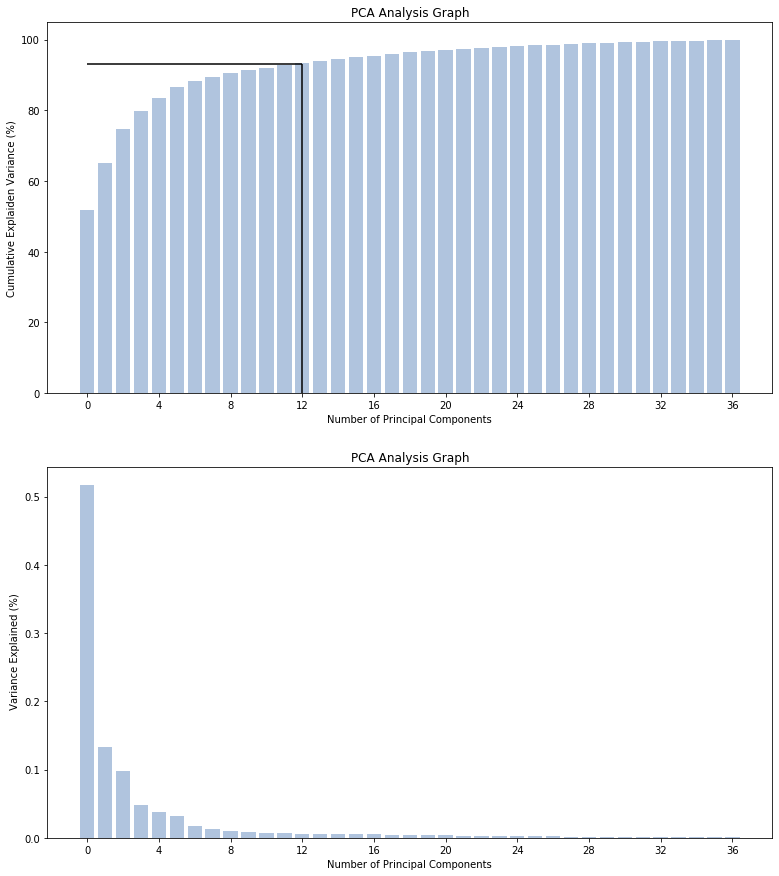

In [35]:
index = np.arange(n_components)
values = pca.explained_variance_ratio_
pca_analysis_plot(n_conponents= n_components, 
             index= index, 
             var_values = values,#
             cum_sum = cumulative_sum_var)